In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import model_selection, preprocessing
color = sns.color_palette()

%matplotlib inline

/home/simon/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
train = pd.read_csv('../input/train.csv', parse_dates=['timestamp'])
test = pd.read_csv('../input/test.csv', parse_dates=['timestamp'])

In [60]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,156
1,datetime64[ns],1
2,float64,120
3,object,15


In [66]:
train_y = train['price_doc']
train_X = train.drop(["id", "timestamp", "price_doc"], axis=1)
for c in train_X.columns:
    if train_X[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_X[c].values)) 
        train_X[c] = lbl.transform(list(train_X[c].values))
        #train_X.drop(c,axis=1,inplace=True)
xgb_params = {
    'eta': 0.1,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 1.0,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)
# # plot the important features #
# fig, ax = plt.subplots(figsize=(12,18))
# xgb.plot_importance(model, height=0.8, ax=ax)
# plt.show()

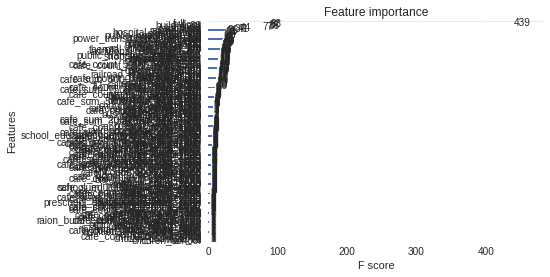

In [4]:
xgb.plot_importance(model)

In [68]:
importance_feature = pd.DataFrame(model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
print importance_feature
importance_feature.to_csv('imp_feature.csv')

                        feature  importance
84                      full_sq         426
156                  build_year         107
159                     life_sq          97
197                       floor          90
18                    max_floor          82
74                     kitch_sq          40
85                        state          35
136                 railroad_km          32
172                    num_room          31
220                      ttk_km          30
131              metro_min_avto          26
157         hospital_beds_raion          25
89                    mosque_km          22
165             kindergarten_km          22
192                swim_pool_km          21
132                    sub_area          21
145                  sadovoe_km          20
48         public_healthcare_km          20
226              metro_min_walk          20
168                big_road1_km          20
203               green_zone_km          19
34                     material 

ValueError: cannot convert float NaN to integer

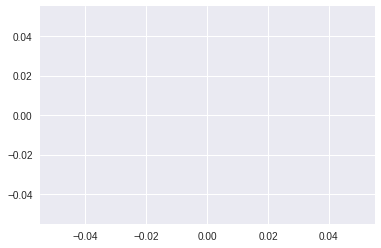

In [32]:
feature = 'floor'
col = test[feature]
sns.distplot(col, kde=True)
plt.xlabel('test ' + feature, fontsize=12)

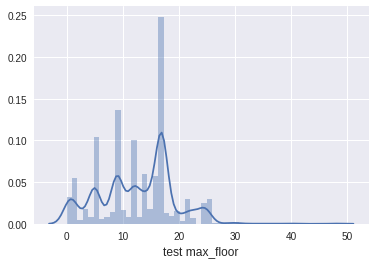

In [64]:
feature = 'max_floor'
tmp = test.loc[~ np.isnan(test[feature]), feature]
col = tmp
sns.distplot(col, kde=True)
plt.xlabel('test ' + feature, fontsize=12)

In [47]:
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,81,16,3,38,80,1,27,127,8,5500000
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,11,18,1,0,47,4,2000000
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,19,8,1,18,34,1,3,85,11,5300000
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,19,13,0,10,20,1,3,67,1,2000000
